# One: import `Pandas` and `sklearn`

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# Two:  Dataset
### 2.1 looking in the Dataset
- `idID`: number
- ` diagnosis`: of breast tissues (M = malignant, B = benign)
- `radius_meanmean`: of distances from center to points on the perimeter
- `texture_meanstandard` deviation of gray-scale values
- `perimeter_meanmean`: size of the core tumor
- `area_mean`
- `smoothness_meanmean`: of local variation in radius lengths
- `compactness_meanmean`: of perimeter^2 / area - 1.0
- `concavity_meanmean`: of severity of concave portions of the contour
- `concave`: points_meanmean for number of concave portions of the contour
- `symmetry_mean`
- `fractal_dimension_meanmean`: for "coastline approximation" - 1
- `radius_sestandard`: error for the mean of distances from center to points on the perimeter
- `texture_sestandard` error for standard deviation of gray-scale values
- `perimeter_se`
- `area_se`
- `smoothness_sestandard`: error for local variation in radius lengths
- `compactness_sestandard`: error for perimeter^2 / area - 1.0
- `concavity_sestandard`: error for severity of concave portions of the contour
- `concave`: points_sestandard error for number of concave portions of the contour
- `symmetry_se`
- `fractal_dimension_sestandard`: error for "coastline approximation" - 1
- `radius_worst`:"worst" or largest mean value for mean of distances from center to points on the perimeter
- `texture_worst`:"worst" or largest mean value for standard deviation of gray-scale values
- `perimeter_worst`
- `area_worst`
- `smoothness_worst`: "worst" or largest mean value for local variation in radius lengths
- `compactness_worst`:"worst" or largest mean value for perimeter^2 / area - 1.0
- `concavity_worst`: "worst" or largest mean value for severity of concave portions of the contour
- `concave`: points_worst"worst" or largest mean value for number of concave portions of the contour
- `symmetry_worst`
- `fractal_dimension_worst`: "worst" or largest mean value for "coastline approximation" - 1

In [2]:
df=pd.read_csv('Cancer_Detection.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2.2 See the names of the `columns`

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 2.3 The shpe of the Dataset

In [4]:
df.shape

(569, 33)

### 2.4 Data type

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 2.5 Look if there any missing value

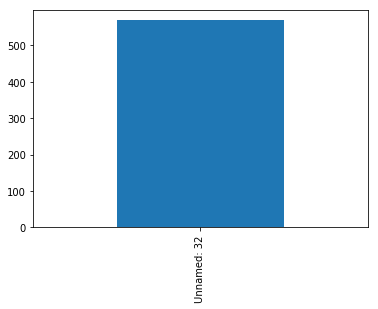

In [6]:
data = df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)
data.plot(kind="bar")
plt.show()

### 2.6 We found that the column `Unnamed: 32` is empty so we will drop it

In [7]:
df=df.drop("Unnamed: 32",axis=1)
# df=df.drop("id",axis=1)

### 2.7 change the `diagnosis` value to `int64`

In [8]:
data={'M':1,'B':0}
df['diagnosis']=[data[i] for i in df.diagnosis.astype(str)]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df['diagnosis'].dtype

dtype('int64')

### 2.8 Use `boxplot` to see the outliers in `radius_mean`

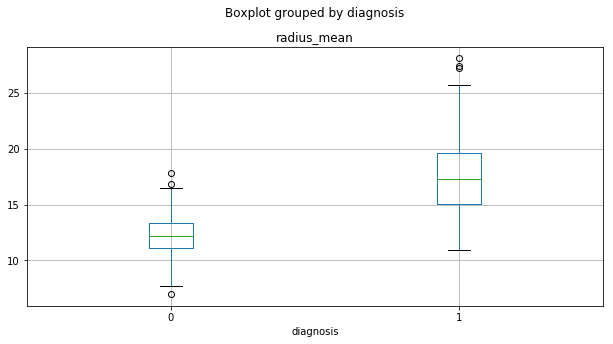

In [9]:
df.boxplot(column='radius_mean', by='diagnosis', figsize=(10,5))
plt.subplots_adjust(top=0.87);

### 2.9 Use `boxplot` to see the outliers in `area_mean`

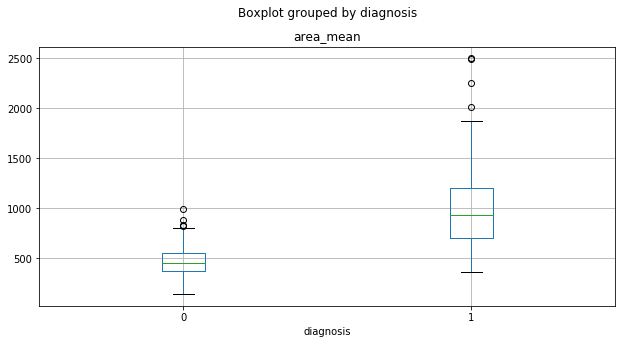

In [10]:
df.boxplot(column='area_mean', by='diagnosis', figsize=(10,5))
plt.subplots_adjust(top=0.87);

### 2.10 Use `heatmap` 

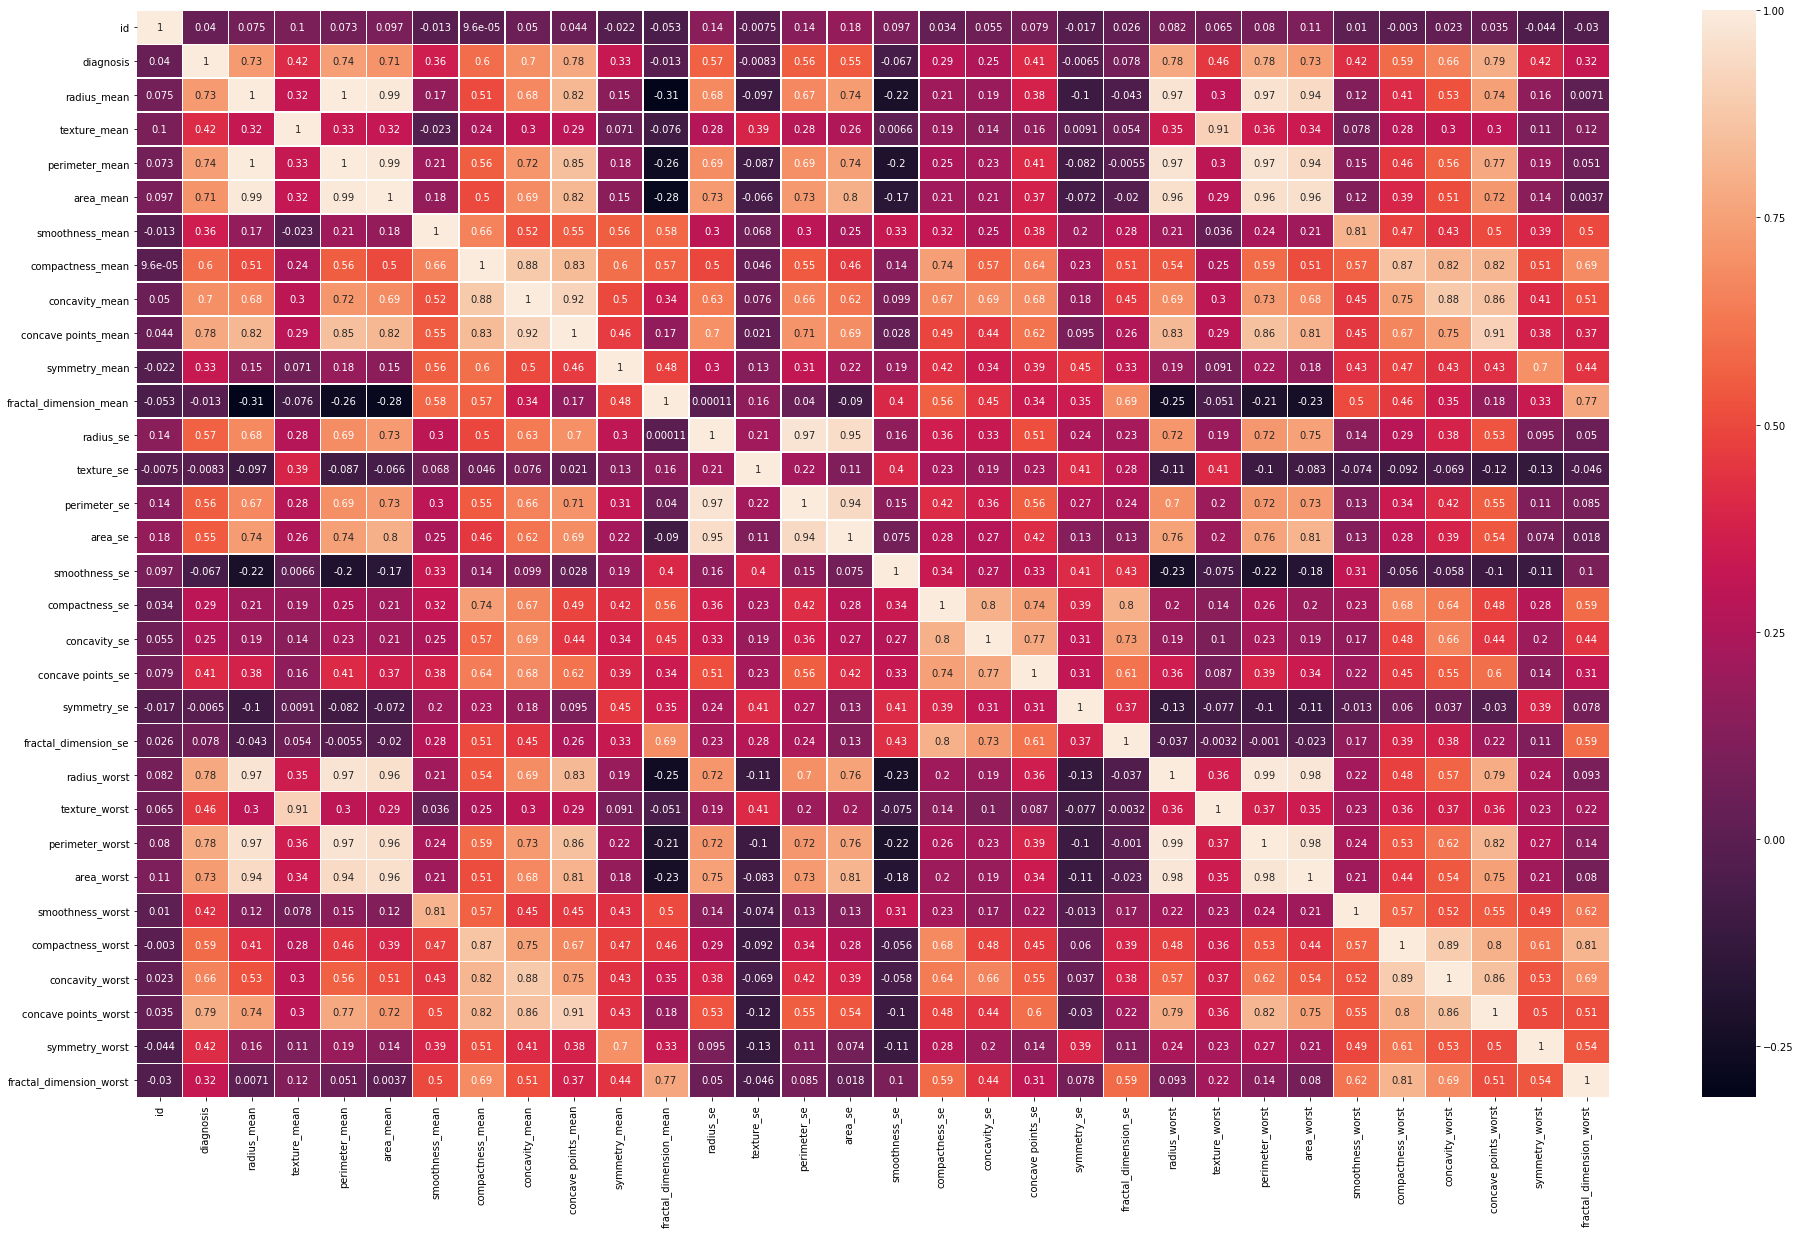

In [11]:
plt.figure(figsize=(33,20))
sns.heatmap(df.corr(), annot=True, linewidth=0.4);

# Three: using sklearn

### 3.1 split the data into `training` and `testing` set

In [12]:
X = df[['radius_mean','area_mean']]
Y = df['diagnosis']
X_train, X_test, y_train, y_test  = train_test_split(X,Y)

### 3.2 using Linear Regression

In [17]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg_prediction=reg.predict(X_test)
reg.score(X_test,y_test)

0.5368422999615748

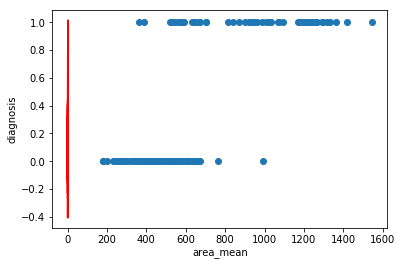

In [28]:
plt.scatter(X_test['area_mean'],y_test)
plt.plot(y_test,reg_prediction,color = 'r')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

### 3.3 using Linear Regression

In [19]:
clf = linear_model.LogisticRegression()
clf.fit(X_train,y_train)
clf_prediction=clf.predict(X_test)
clf.score(X_test,y_test)

0.8671328671328671

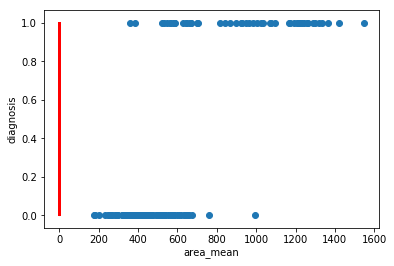

In [27]:
plt.scatter(X_test['area_mean'],y_test)
plt.plot(y_test,clf_prediction,color = 'r')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()


### 3.4 using Linear Regression

In [21]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_prediction=gnb.predict(X_test)
gnb.score(X_test,y_test)

0.8741258741258742

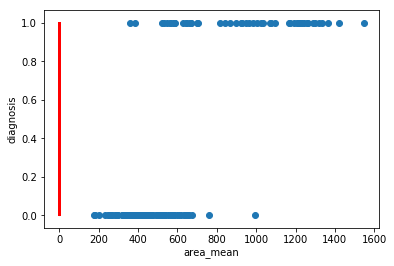

In [29]:
plt.scatter(X_test['area_mean'],y_test)
plt.plot(y_test,gnb_prediction,color = 'r')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()